# Image enhancement based on spatial operator
![](https://ai-studio-static-online.cdn.bcebos.com/c33a077ad39648a5913ae2b6f3b038aee94ccb38921f4046afba62d467d62d97)
![](https://ai-studio-static-online.cdn.bcebos.com/bac8837fde2b42a58afde16a549a582afb2011331290479aae7e3028f463aa65)


## 第二次提交
距离第一次提交的版本之上做出了很大的改进，在间隔的这几天中，从想方设法的模仿书上的图片，到尽可能的理解image enhancement的底层逻辑，从而在每张图的出图方面做出了很大的改善。

#### 其中主要和第一版的改善主要有
* 在输入的时候使用flags=0去选择一个channel，而没有固定为grey的方式
* 在(b)-(h)中的生成中，大多新增加了使用np.uint8(cv2.normalize())的函数，其目的是为了避免出现数据大于255的情况从而无法保存或者是生成；并且通过normalize()的方式
* 尽可能的精简表述过程，取消单独代码生成一张图的形式，避免冗余和弱可视化的缺点
* 在对于matplotlib库更加深入了解的过程中，调整了一种更加整齐而美观的输出方式，从而更加直观的看出image enhancement的每个阶段的图像横向对比
* 相较于第一版，最后成像有很大的改观，其中前面几张图实际上是相似的，主要从(f)图开始，需要将通过$5*5$盒式滤波器和通过拉普拉斯变换的图相乘，在第一版中此图有极大的噪声，这个为后期(h)生成造成极大的困扰。
* 因此选择加入权重的相叠加，如(g)中两图相加时候，将具有较大噪声的(f)赋予较小权重，因此使得最后的成图(h)尽可能的看起来像题目所给的要求效果。
#### 一些不足
* 最直观的就是在第二张(b)拉普拉斯的效果图方面，没有进行和书上一样的灰度化，是因为在多次尝试中，按照现操作能得到更加接近原图的(h)
* (h)虽然费了很大功夫尽可能的接近题目效果，但是仍然有一些需要微调和改进的地方。
* 希望这些不足之处在后面有时间时候都可以进一步优化，希望这些不足不会影响到得分

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# （a）原图
img_0= cv2.imread('data/bonescan.tif',flags=0)
img = img_0


# （b）拉普拉斯变化
kernLaplace = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.int8) 
Laplacian = cv2.filter2D(img, ddepth=-1, kernel=kernLaplace)
imgLaplacian = np.uint8(cv2.normalize(Laplacian, None, 0, 255, cv2.NORM_MINMAX))
img_b = imgLaplacian


# plt.figure(figsize=(10, 7))
# titleList = ["a", "b"]
# imageList = [img, img_b,]
# for i in range(2):
#     plt.subplot(2,4,i+1), plt.title(titleList[i]), plt.axis('off')
#     plt.imshow(imageList[i], 'gray', vmin=0, vmax=255)
# plt.tight_layout()
# plt.show() 

In [17]:
# （c）ab相加并且锐化

#resize the two images
img1_resized=cv2.resize(img,(200,300))
img2_resized=cv2.resize(img_b,(200,300))

# "+"
img_c = img1_resized+img2_resized
img_c = np.uint8(cv2.normalize(img_c, None, 0, 255, cv2.NORM_MINMAX))


# plt.subplot(1,2,1)
# plt.imshow(img_c,"gray")
# plt.title("c",size=15)
# plt.xticks([])
# plt.yticks([])
# # plt.figure(figsize=(10,20))


In [18]:
# (d) 经过Sobel梯度处理的图像


# SobelXY
sobelx = cv2.Sobel(img, cv2.CV_64F, 1,0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0,1, ksize=3)
abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
# img_d = sobelxy
img_d = np.uint8(cv2.normalize(sobelxy, None, 0, 255, cv2.NORM_MINMAX))

# plt.figure(figsize=(10, 7))
# plt.subplot(1,2,1)
# plt.imshow(img_d,"gray", vmin=0, vmax=255)
# plt.title("d",size=15)
# plt.xticks([])
# plt.yticks([])


In [19]:
# (e) 5*5盒式滤波器

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


# #读取图片
# img_src=img_d
# #缩放图片大小
# img=cv2.resize(src=img_src,dsize=(450,450))
# #方盒滤波
# img_e=cv2.boxFilter(src=img,ddepth=-1,ksize=(5,5),normalize=True)
# #显示图片
# plt.subplot(1,1,1)
# plt.imshow(img_e,"gray")
# plt.title("e",size=15)
# plt.xticks([])
# plt.yticks([])


kernelBox = np.ones(5, np.float32) / (5 * 5)  
# cv2.filter2D 方法
SobelBox = cv2.filter2D(img_d, -1, kernelBox)  
img_e = cv2.normalize(SobelBox, None, 0, 255, cv2.NORM_MINMAX)


# plt.subplot(1,1,1)
# plt.imshow(img_e,"gray")
# plt.title("e",size=15)
# plt.xticks([])
# plt.yticks([])

In [20]:
# (f)  b*e

img1_resized = cv2.resize(img_b,(200,300))
img2_resized = cv2.resize(img_e,(200,300))

img_multiple=cv2.multiply(img1_resized,img2_resized)
img_f = np.uint8(cv2.normalize(img_multiple, None, 0, 255, cv2.NORM_MINMAX))



# plt.imshow(img_f, 'gray')
# plt.title("f")
# plt.xticks([])
# plt.yticks([])

In [21]:
# (g) 图(a)+(f)


#resize the two images
img1_resized=cv2.resize(img,(200,300))
img2_resized=cv2.resize(img_f,(200,300))

# "+"
img_g_0 = img1_resized+img2_resized*0.3
img_g = np.uint8(cv2.normalize(img_g_0, None, 0, 255, cv2.NORM_MINMAX))

# plt.subplot(1,2,1)
# plt.imshow(img_g,"gray")
# plt.title("g")
# plt.xticks([])
# plt.yticks([])


In [22]:
# (h)对g应用一个幂律变化

#  Gamma和epsilon系数的设定
parameter = 1e-5 
Gamma = np.power(img_g + parameter, 0.5)
imgGamma = np.uint8(cv2.normalize(Gamma, None, 0, 255, cv2.NORM_MINMAX))
img_h = imgGamma


# plt.subplot(1,2,1)
# plt.imshow(img_h,"gray")
# plt.title("h")
# plt.xticks([])
# plt.yticks([])


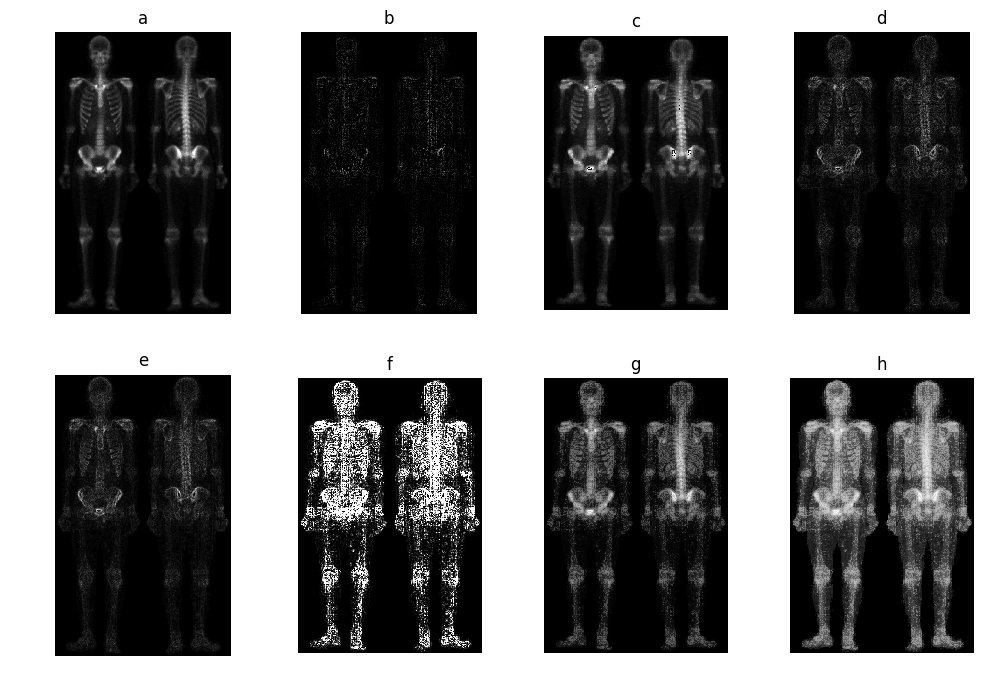

In [23]:
#绘制图像
plt.figure(figsize=(10, 7))
titleList = ["a", "b", "c", "d","e", "f", "g", "h"]
imageList = [img_0,img_b,img_c,img_d,img_e,img_f,img_g,img_h]
for i in range(8):
    plt.subplot(2,4,i+1), plt.title(titleList[i]), plt.axis('off')
    plt.imshow(imageList[i], 'gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show() 